<a href="https://colab.research.google.com/github/springboardmentor425/MediAlert-AI-Anomaly-Detection-for-Smarter-Healthcare-Insights/blob/pravallika/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [ ]:
df = pd.read_csv('/content/Healthcare Providers1.csv')

In [ ]:
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.5877778,305.2111111,157.2622222,160.9088889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.3152571
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.53939394,19.05757576
5,3443985,1346571551,PUGH,JOHN,R,DPT,M,I,504 ALBEMARLE SQ,NaN,...,97016,Application of blood vessel compression or dec...,N,192,36,192,13.55098958,63.1125,9.676458333,10.50692708
6,2137027,1215943535,BRUMITT,TOM,B,DO,M,I,70 DOCTORS PARK,NaN,...,20610,Aspiration and/or injection of large joint or ...,N,21,19,21,45.97190476,164.5714286,36.03619048,37.77952381
7,6169160,1629160551,GALBREATH,RONALD,G,M.D.,M,I,12522 E. LAMBERT ROAD,SUITE D,...,G0008,Administration of influenza virus vaccine,N,52,50,52,29.33,50,28.74,25.32
8,5086226,1518929124,BOONE,RALPH,M,D.O.,M,I,1215 DUNN AVE,NaN,...,80061,"Blood test, lipids (cholesterol and triglyceri...",N,73,68,73,15.51041096,76,15.19794521,15.19794521
9,3900718,1396781134,METWEST INC,NaN,NaN,NaN,NaN,O,695 S BROADWAY,NaN,...,84392,Urine sulfate (acid) level,N,19,16,19,6.51,29.65,6.38,6.38


In [ ]:
rows, columns = df.shape
print(f"The dataset contains {rows} rows and {columns} columns.")

The dataset contains 100000 rows and 27 columns.


In [ ]:

# Count missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

In [ ]:
print("\nStatistical summary of the dataset:")
print(df.describe(include='all'))


Statistical summary of the dataset:
               index  National Provider Identifier  \
count   1.000000e+05                  1.000000e+05   
unique           NaN                           NaN   
top              NaN                           NaN   
freq             NaN                           NaN   
mean    4.907646e+06                  1.498227e+09   
std     2.839633e+06                  2.874125e+08   
min     2.090000e+02                  1.003001e+09   
25%     2.458791e+06                  1.245669e+09   
50%     4.901266e+06                  1.497847e+09   
75%     7.349450e+06                  1.740374e+09   
max     9.847440e+06                  1.993000e+09   

       Last Name/Organization Name of the Provider First Name of the Provider  \
count                                       100000                      95745   
unique                                       42820                      13022   
top                                          PATEL                    M

In [ ]:
print("\nMissing values and their percentages:")
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
})
print(missing_data)


Missing values and their percentages:
                                                    Missing Values  Percentage
index                                                            0       0.000
National Provider Identifier                                     0       0.000
Last Name/Organization Name of the Provider                      0       0.000
First Name of the Provider                                    4255       4.255
Middle Initial of the Provider                               29331      29.331
Credentials of the Provider                                   7209       7.209
Gender of the Provider                                        4254       4.254
Entity Type of the Provider                                      0       0.000
Street Address 1 of the Provider                                 0       0.000
Street Address 2 of the Provider                             59363      59.363
City of the Provider                                             0       0.000
Zip Code of t

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns # Replace cleaned_df with df
print("Numerical Columns:")
print(numerical_columns)

categorical_columns = df.select_dtypes(include=['object']).columns # Replace cleaned_df with df
print("\nCategorical Columns:")
print(categorical_columns)


Numerical Columns:
Index(['index', 'National Provider Identifier', 'Zip Code of the Provider'], dtype='object')

Categorical Columns:
Index(['Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider',
       'Credentials of the Provider', 'Gender of the Provider',
       'Entity Type of the Provider', 'Street Address 1 of the Provider',
       'Street Address 2 of the Provider', 'City of the Provider',
       'State Code of the Provider', 'Country Code of the Provider',
       'Provider Type', 'Medicare Participation Indicator', 'Place of Service',
       'HCPCS Code', 'HCPCS Description', 'HCPCS Drug Indicator',
       'Number of Services', 'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount'],
      dtype='object')


In [ ]:
# List of categorical columns to fill with mode
categorical_columns = [
    'First Name of the Provider',
    'Middle Initial of the Provider',
    'Credentials of the Provider',
    'Gender of the Provider'
]

# Fill missing values for each column using df instead of cleaned_df
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True) # Replace cleaned_df with df to modify the original DataFrame

<ipython-input-11-fc166aab5d15>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True) # Replace cleaned_df with df to modify the original DataFrame


In [ ]:
print("\nMissing values after imputation:")
print(df.isnull().sum()) # Replace cleaned_df with df


Missing values after imputation:
index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                      0
Middle Initial of the Provider                                  0
Credentials of the Provider                                     0
Gender of the Provider                                          0
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                             

In [ ]:
min_max_f=['Number of Services','Number of Medicare Beneficiaries','Number of Distinct Medicare Beneficiary/Per Day Services']
Standard_f=['Average Medicare Allowed Amount','Average Submitted Charge Amount','Average Medicare Payment Amount','Average Medicare Standardized Amount']

In [ ]:
!pip install scikit-learn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

min_max_f=['Number of Services','Number of Medicare Beneficiaries','Number of Distinct Medicare Beneficiary/Per Day Services']
Standard_f=['Average Medicare Allowed Amount','Average Submitted Charge Amount','Average Medicare Payment Amount','Average Medicare Standardized Amount']

# Create pipelines for MinMaxScaler and StandardScaler
min_max_transform = make_pipeline(MinMaxScaler())
Standard_transform = make_pipeline(StandardScaler())

In [ ]:
ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('min max',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Number of Services',
                                  'Number of Medicare Beneficiaries',
                                  'Number of Distinct Medicare Beneficiary/Per '
                                  'Day Services']),
                                ('standard',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Average Medicare Allowed Amount',
                                  'Average Submitted Charge Amount',
                                  'Average Medicare Payment Amount',
                                  'Average Medicare Standardized Amount'])],
                  verbose_feature_names_out=False)

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('min max',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Number of Services',
                                  'Number of Medicare Beneficiaries',
                                  'Number of Distinct Medicare Beneficiary/Per '
                                  'Day Services']),
                                ('standard',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Average Medicare Allowed Amount',
                                  'Average Submitted Charge Amount',
                                  'Average Medicare Payment Amount',
                                  'Average Medicare Standardized Amount'])],
                  verbose_feature_names_out=False)

In [ ]:
# Assuming 'df' is your original DataFrame containing the data

# Import necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Assuming 'df' is your original DataFrame containing the data

# Import necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('min_max', MinMaxScaler(), ['Number of Services', 'Number of Medicare Beneficiaries', 'Number of Distinct Medicare Beneficiary/Per Day Services']),
        ('standard', StandardScaler(), ['Average Medicare Allowed Amount', 'Average Submitted Charge Amount']),
    ])
# Import necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('min_max', MinMaxScaler(), ['Number of Services', 'Number of Medicare Beneficiaries', 'Number of Distinct Medicare Beneficiary/Per Day Services']),
        ('standard', StandardScaler(), ['Average Medicare Allowed Amount', 'Average Submitted Charge Amount']),
    ])

In [ ]:
# Assuming 'df' is your original DataFrame containing the data
for col in ['Number of Services', 'Number of Medicare Beneficiaries', 'Number of Distinct Medicare Beneficiary/Per Day Services', 'Average Medicare Allowed Amount', 'Average Submitted Charge Amount']:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

# Import necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('min_max', MinMaxScaler(), ['Number of Services', 'Number of Medicare Beneficiaries', 'Number of Distinct Medicare Beneficiary/Per Day Services']),
        ('standard', StandardScaler(), ['Average Medicare Allowed Amount', 'Average Submitted Charge Amount']),
    ])

# Define the selected columns for anomaly detection
selected_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

# Assuming 'df' is your original DataFrame and 'preprocessor' is your ColumnTransformer
# Transform the data using the preprocessor
transformed_data = preprocessor.fit_transform(df) # This line is added to create transformed_data

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Assuming 'df' is your original DataFrame containing the data
for col in ['Number of Services', 'Number of Medicare Beneficiaries', 'Number of Distinct Medicare Beneficiary/Per Day Services', 'Average Medicare Allowed Amount', 'Average Submitted Charge Amount']:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

# Import necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('min_max', MinMaxScaler(), ['Number of Services', 'Number of Medicare Beneficiaries', 'Number of Distinct Medicare Beneficiary/Per Day Services']),
        ('standard', StandardScaler(), ['Average Medicare Allowed Amount', 'Average Submitted Charge Amount']),
    ])

# Define the selected columns for anomaly detection
selected_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

# Assuming 'df' is your original DataFrame and 'preprocessor' is your ColumnTransformer
# Transform the data using the preprocessor
data_scaled = preprocessor.fit_transform(df[selected_columns])  # Scale the selected columns and store in data_scaled

# ... rest of your code ...

# Autoencoder for Advanced Modeling
input_dim = data_scaled.shape[1]  # Now data_scaled is defined and has a shape
input_layer = Input(shape=(input_dim,))

# ... rest of your code ...

In [ ]:
# Autoencoder for Advanced Modeling
input_dim = data_scaled.shape[1]
input_layer = Input(shape=(input_dim,))

In [ ]:
# Encoder
encoder = Dense(16, activation='relu')(input_layer)
encoder = Dense(8, activation='relu')(encoder)

In [ ]:
# Decoder
decoder = Dense(16, activation='relu')(encoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)

In [ ]:
# Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
# Train Autoencoder
history = autoencoder.fit(
    data_scaled, data_scaled,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5513 - val_loss: 0.3284
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2779 - val_loss: 0.3232
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2881 - val_loss: 0.3214
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3424 - val_loss: 0.3210
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2988 - val_loss: 0.3208
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2885 - val_loss: 0.3207
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2903 - val_loss: 0.3206
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3301 - val_loss: 0.3205
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3253 - val_loss: 0.3205
Epoch 10/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3268 - val_loss: 0.3204
Epoch 11/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3230 - val_loss: 0.3204
Epoch 12/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

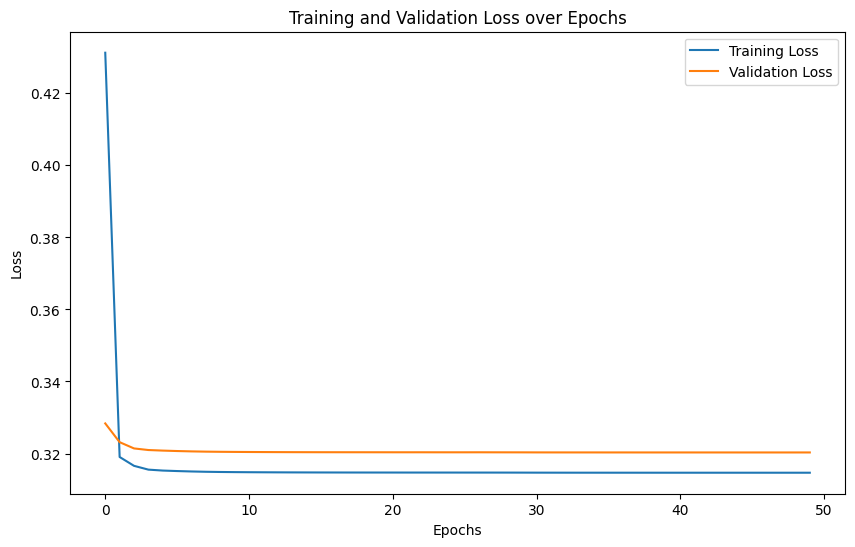

In [ ]:
# Plot Training Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Reconstruction Error
reconstructions = autoencoder.predict(data_scaled)
mse = np.mean(np.power(data_scaled - reconstructions, 2), axis=1)
thresh = np.percentile(mse, 95)
df['Autoencoder_Outlier'] = (mse > thresh).astype(int) # Replace 'data' with 'df'

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


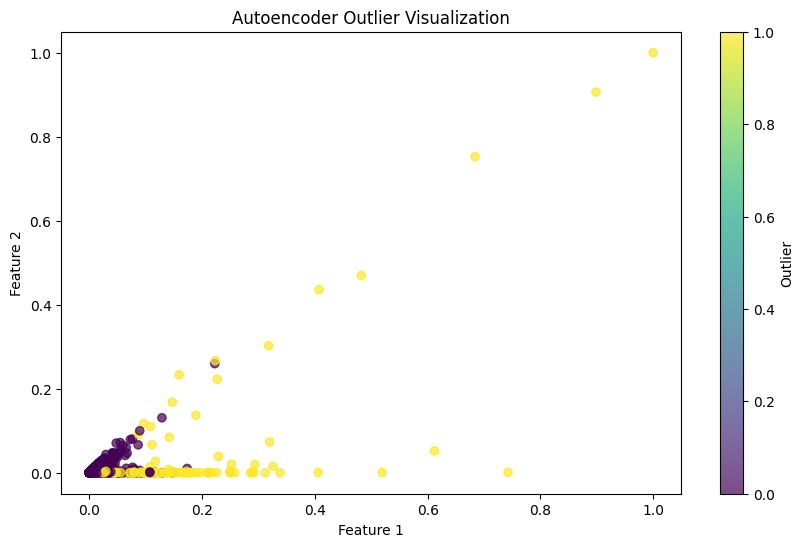

In [ ]:
# Visualization of Autoencoder Outliers using Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=df['Autoencoder_Outlier'], cmap='viridis', alpha=0.7) # Replace 'data' with 'df'
plt.title('Autoencoder Outlier Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Outlier')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# Assuming 'data_scaled' from previous cells contains the preprocessed data for anomaly detection
billing_anomaly_df = pd.DataFrame(data_scaled) # Convert data_scaled to a DataFrame if it's not already

# Proceed with train-test split
X_train, X_val = train_test_split(billing_anomaly_df, test_size=0.2, random_state=42)
input_dim = X_train.shape[1]

In [ ]:
autoencoder = Sequential([
    # Encoder
    Dense(16, activation='relu', input_shape=(input_dim,), kernel_regularizer='l2'),
    Dropout(0.1),  # Dropout to prevent overfitting
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),  # Bottleneck

    # Decoder
    Dense(16, activation='relu'),
    Dropout(0.1),  # Dropout to prevent overfitting #This line was causing the error, it's now correctly indented.
    Dense(16, activation='relu'),
    Dense(input_dim, activation='linear')  # Reconstruction layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.5270 - val_loss: 0.3559
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3622 - val_loss: 0.2539
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2883 - val_loss: 0.1202
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1585 - val_loss: 0.0796
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1290 - val_loss: 0.0639
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1105 - val_loss: 0.0568
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0914 - val_loss: 0.0521
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1034 - val_loss: 0.0503
Epoch 9/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0983 - val_loss: 0.0475
Epoch 10/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1110 - val_loss: 0.0458
Epoch 11/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0909 - val_loss: 0.0440
Epoch 12/100
625/625 ━━━━━━━━━━━━━━━━━━━━

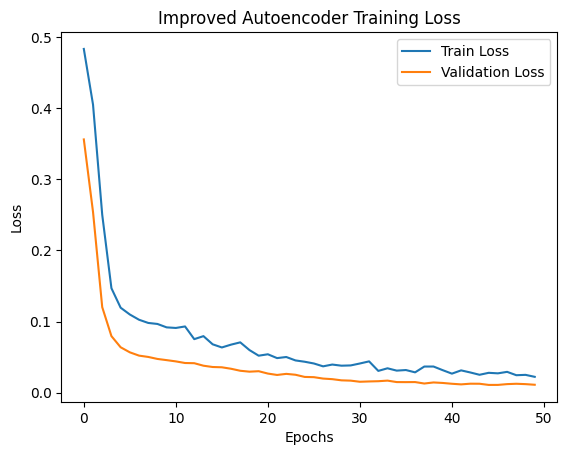

In [ ]:


# Step 3: Compile the Model
autoencoder.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# Step 4: Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Step 5: Train the Model
history = autoencoder.fit(
    X_train, X_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_val, X_val),
    callbacks=[early_stopping],
    verbose=1
)

# Step 6: Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Improved Autoencoder Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()